# Deep Learning Fundamentals - LU02 Lab Exercise

## 2.1 Import required package and load data from file into pandas dataframe

In [1]:
import pandas as pd
import numpy as np
import numpy.random as nr
from keras import models
from keras import layers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from keras import regularizers

# Import the data using the file path
data = pd.read_csv('Ames_Housing_Sales.csv', sep=',')
print('Data shape: {}'.format(data.shape))

Data shape: (1359, 80)


## 2.2 Data Preparation
Extract the label column containing the SalePrice and remove from the dataset

In [2]:
y_col_name = 'SalePrice'
y_data = data[y_col_name]

x_data = data.drop(y_col_name, axis=1)

Perform One-Hot Encoding on all categorical data columns

In [3]:
# OneHot Encode categorical data
categorical_data = x_data.select_dtypes(include=['object']).copy()
for col in categorical_data.columns:
    categorical_data[col] = categorical_data[col].astype('category')

categorical_data = pd.get_dummies(categorical_data)
print('Categorical data shape: {}'.format(categorical_data.shape))

Categorical data shape: (1359, 258)


Normalize data scales for numerical data and the labels

In [4]:
# Standard Scale numerial feature data
numerical_data = x_data.select_dtypes(include=['float64', 'int64']).copy()
data_tmp = numerical_data.values #returns a numpy array
std_scaler = StandardScaler()
data_tmp = std_scaler.fit_transform(data_tmp)
numerical_data = pd.DataFrame(data_tmp, columns=numerical_data.columns)

# Standard Scale numerial label data
y_tmp = pd.DataFrame(y_data).values #returns a numpy array
y_scaler = MinMaxScaler()
y_tmp = y_scaler.fit_transform(y_tmp)
y_tmp = y_tmp.reshape(-1)
y_data = pd.Series(y_tmp)

In [5]:
# Combine categorial and numerical data
x_data = pd.concat([numerical_data, categorical_data], axis=1)
print('x_data data shape: {}'.format(x_data.shape))

x_col_name = x_data.columns
x_col_count = len(x_col_name)

x_data data shape: (1359, 294)


## 2.3 Split the data

### Method 1

In [6]:
# Define the model
network = models.Sequential()
network.add(layers.Dense(1, activation='sigmoid', input_shape=(x_col_count,)))
network.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Split data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

print('X_train data shape: {}'.format(X_train.shape))
print('X_test data shape: {}'.format(X_test.shape))
print('X_val data shape: {}'.format(X_val.shape))

# Pass the validation data into the fit method directory
history = network.fit(X_train, y_train, epochs=20, batch_size=8, validation_data=(X_val, y_val))

X_train data shape: (951, 294)
X_test data shape: (204, 294)
X_val data shape: (204, 294)
Epoch 1/20
119/119 [==============================] - 2s 8ms/step - loss: 0.0417 - mae: 0.1463 - val_loss: 0.0101 - val_mae: 0.0682
Epoch 2/20
119/119 [==============================] - 0s 4ms/step - loss: 0.0079 - mae: 0.0610 - val_loss: 0.0064 - val_mae: 0.0539
Epoch 3/20
119/119 [==============================] - ETA: 0s - loss: 0.0055 - mae: 0.050 - 0s 4ms/step - loss: 0.0055 - mae: 0.0503 - val_loss: 0.0054 - val_mae: 0.0487
Epoch 4/20
119/119 [==============================] - 0s 4ms/step - loss: 0.0045 - mae: 0.0448 - val_loss: 0.0046 - val_mae: 0.0448
Epoch 5/20
119/119 [==============================] - 0s 4ms/step - loss: 0.0038 - mae: 0.0403 - val_loss: 0.0040 - val_mae: 0.0412
Epoch 6/20
119/119 [==============================] - 0s 4ms/step - loss: 0.0033 - mae: 0.0373 - val_loss: 0.0034 - val_mae: 0.0388
Epoch 7/20
119/119 [==============================] - 0s 3ms/step - loss: 0.0029

### Method 2

In [7]:
# Define the model
network = models.Sequential()
network.add(layers.Dense(1, activation='sigmoid', input_shape=(x_col_count,)))
network.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Split data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.4)

print('X_train data shape: {}'.format(X_train.shape))
print('X_test data shape: {}'.format(X_test.shape))

# Specify the validation split in the fit method
history = network.fit(X_train, y_train, epochs=20, batch_size=8, validation_split=0.2)

X_train data shape: (815, 294)
X_test data shape: (544, 294)
Epoch 1/20
82/82 [==============================] - 1s 6ms/step - loss: 0.0557 - mae: 0.1798 - val_loss: 0.0097 - val_mae: 0.0674
Epoch 2/20
82/82 [==============================] - 0s 3ms/step - loss: 0.0082 - mae: 0.0609 - val_loss: 0.0053 - val_mae: 0.0508
Epoch 3/20
82/82 [==============================] - 0s 3ms/step - loss: 0.0059 - mae: 0.0515 - val_loss: 0.0040 - val_mae: 0.0448
Epoch 4/20
82/82 [==============================] - 0s 3ms/step - loss: 0.0049 - mae: 0.0474 - val_loss: 0.0034 - val_mae: 0.0416
Epoch 5/20
82/82 [==============================] - 0s 3ms/step - loss: 0.0040 - mae: 0.0437 - val_loss: 0.0030 - val_mae: 0.0389
Epoch 6/20
82/82 [==============================] - 0s 3ms/step - loss: 0.0034 - mae: 0.0407 - val_loss: 0.0027 - val_mae: 0.0370
Epoch 7/20
82/82 [==============================] - 0s 3ms/step - loss: 0.0029 - mae: 0.0373 - val_loss: 0.0023 - val_mae: 0.0350
Epoch 8/20
82/82 [===========

## 2.4 Build and train model

In [8]:
# Split data into train-test sets
X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

network = models.Sequential()

# This is 1 input layer of x_col_count nodes and 1 output later of 1 node
network.add(layers.Dense(1, activation='sigmoid', input_shape=(x_col_count,)))

# >>>>>>>>> the following set is a sample if to create multiple layer >>>>>>>>>>>>>
#example to create multiple layers. the following example is 
# 1 input layer of x_col_count nodes 
# 2 hidden layers of 5 and 3 nodes respectively
# 1 output layer of 1 node on predicted sales pricing
#network.add(layers.Dense(3, activation='relu', input_shape=(x_col_count,)))
#network.add(layers.Dense(1, activation='sigmoid'))
# <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<

# Observe the use loss function in the codes below
#network.compile(optimizer='sgd',
#                loss='mean_squared_error',
#               metrics=['mse'])

# Observe the setting of shuffle to True
# Play around the epochs, batch_size to see the effect 
# (Try to achieve <0.001 loss)
nr.seed(9898)

network.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

# Plot loss and accuracy graph
history = network.fit(X_train, y_train, epochs=20, batch_size=8, validation_split=0.2)

Epoch 1/20
95/95 [==============================] - 1s 6ms/step - loss: 0.0173 - mae: 0.0955 - val_loss: 0.0056 - val_mae: 0.0557
Epoch 2/20
95/95 [==============================] - 0s 3ms/step - loss: 0.0046 - mae: 0.0485 - val_loss: 0.0039 - val_mae: 0.0456
Epoch 3/20
95/95 [==============================] - 0s 3ms/step - loss: 0.0032 - mae: 0.0404 - val_loss: 0.0032 - val_mae: 0.0409
Epoch 4/20
95/95 [==============================] - 0s 3ms/step - loss: 0.0024 - mae: 0.0348 - val_loss: 0.0026 - val_mae: 0.0368
Epoch 5/20
95/95 [==============================] - 0s 3ms/step - loss: 0.0018 - mae: 0.0309 - val_loss: 0.0024 - val_mae: 0.0348
Epoch 6/20
95/95 [==============================] - 0s 3ms/step - loss: 0.0015 - mae: 0.0283 - val_loss: 0.0021 - val_mae: 0.0327
Epoch 7/20
95/95 [==============================] - 0s 3ms/step - loss: 0.0013 - mae: 0.0263 - val_loss: 0.0020 - val_mae: 0.0314
Epoch 8/20
95/95 [==============================] - 0s 3ms/step - loss: 0.0011 - mae: 0.02

## 2.5 Evaluate the model

In [9]:
test_loss, test_mae = network.evaluate(X_test, y_test)
print('Test loss: {:.4f}'.format(test_loss))
print('Test mae: {:.4f}'.format(test_mae))

13/13 [==============================] - 0s 3ms/step - loss: 0.0038 - mae: 0.0265
Test loss: 0.0038
Test mae: 0.0265


## 2.5.1 Add the codes for plotting the graph to visualise the evaluation. 
Note: You will need to amend the fit to support the plotting

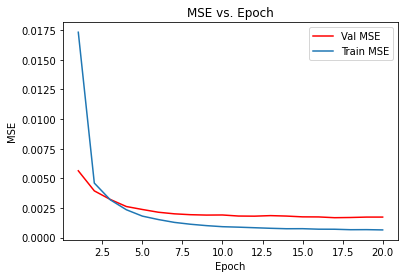

In [10]:
import matplotlib.pyplot as plt
def plot_loss(history):
    train_loss = history.history['loss']
    test_loss = history.history['val_loss']
    x = list(range(1, len(test_loss) + 1))
    plt.plot(x, test_loss, color = 'red', label = 'Val MSE')
    plt.plot(x, train_loss, label = 'Train MSE')
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.title('MSE vs. Epoch')
    plt.legend()
    
plot_loss(history)  

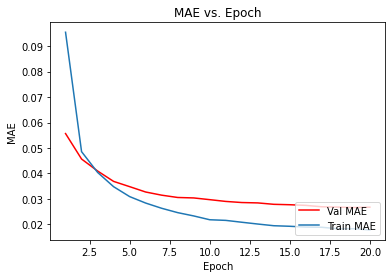

In [11]:
def plot_mse(history):
    train_acc = history.history['mae']
    test_acc = history.history['val_mae']
    x = list(range(1, len(test_acc) + 1))
    plt.plot(x, test_acc, color = 'red', label = 'Val MAE')
    plt.plot(x, train_acc, label = 'Train MAE')  
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.title('MAE vs. Epoch')  
    plt.legend(loc='lower right')

plot_mse(history)

## 2.6 Perform a prediction

In [12]:
predictData = pd.read_csv('PredictTest.csv')

In [13]:
predictDataCat = pd.get_dummies(predictData.select_dtypes(include=['object']).copy())
for col in categorical_data.columns:
    if col not in predictDataCat.columns:
        print("Adding missing feature {}".format(col))
        predictDataCat[col] = 0
        
print(predictDataCat.shape)

Adding missing feature Alley_Grvl
Adding missing feature BldgType_2fmCon
Adding missing feature BldgType_Duplex
Adding missing feature BldgType_Twnhs
Adding missing feature BsmtCond_Fa
Adding missing feature BsmtFinType2_ALQ
Adding missing feature BsmtFinType2_BLQ
Adding missing feature BsmtFinType2_GLQ
Adding missing feature BsmtQual_Fa
Adding missing feature Condition1_Feedr
Adding missing feature Condition1_PosA
Adding missing feature Condition1_PosN
Adding missing feature Condition1_RRAe
Adding missing feature Condition1_RRAn
Adding missing feature Condition1_RRNe
Adding missing feature Condition1_RRNn
Adding missing feature Condition2_Artery
Adding missing feature Condition2_Feedr
Adding missing feature Condition2_PosA
Adding missing feature Condition2_PosN
Adding missing feature Condition2_RRAe
Adding missing feature Condition2_RRAn
Adding missing feature Condition2_RRNn
Adding missing feature Electrical_FuseP
Adding missing feature Electrical_Mix
Adding missing feature ExterCond

C:\Users\SaiLam\AppData\Local\Temp/ipykernel_6920/915363927.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predictDataCat[col] = 0
C:\Users\SaiLam\AppData\Local\Temp/ipykernel_6920/915363927.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predictDataCat[col] = 0
C:\Users\SaiLam\AppData\Local\Temp/ipykernel_6920/915363927.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.con

Adding missing feature GarageQual_Ex
Adding missing feature GarageQual_Gd
Adding missing feature GarageQual_Po
Adding missing feature GarageType_2Types
Adding missing feature GarageType_BuiltIn


C:\Users\SaiLam\AppData\Local\Temp/ipykernel_6920/915363927.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predictDataCat[col] = 0
C:\Users\SaiLam\AppData\Local\Temp/ipykernel_6920/915363927.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predictDataCat[col] = 0
C:\Users\SaiLam\AppData\Local\Temp/ipykernel_6920/915363927.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.con

Adding missing feature GarageType_CarPort
Adding missing feature Heating_Floor
Adding missing feature Heating_GasW
Adding missing feature Heating_OthW
Adding missing feature Heating_Wall


C:\Users\SaiLam\AppData\Local\Temp/ipykernel_6920/915363927.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predictDataCat[col] = 0
C:\Users\SaiLam\AppData\Local\Temp/ipykernel_6920/915363927.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predictDataCat[col] = 0
C:\Users\SaiLam\AppData\Local\Temp/ipykernel_6920/915363927.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.con

Adding missing feature HeatingQC_Po
Adding missing feature HouseStyle_1.5Fin
Adding missing feature HouseStyle_2.5Unf
Adding missing feature LandContour_HLS
Adding missing feature LandContour_Low


C:\Users\SaiLam\AppData\Local\Temp/ipykernel_6920/915363927.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predictDataCat[col] = 0
C:\Users\SaiLam\AppData\Local\Temp/ipykernel_6920/915363927.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predictDataCat[col] = 0
C:\Users\SaiLam\AppData\Local\Temp/ipykernel_6920/915363927.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.con

Adding missing feature LandSlope_Sev
Adding missing feature LotConfig_Corner
Adding missing feature LotConfig_FR3
Adding missing feature LotShape_IR2


C:\Users\SaiLam\AppData\Local\Temp/ipykernel_6920/915363927.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predictDataCat[col] = 0
C:\Users\SaiLam\AppData\Local\Temp/ipykernel_6920/915363927.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predictDataCat[col] = 0
C:\Users\SaiLam\AppData\Local\Temp/ipykernel_6920/915363927.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.con

Adding missing feature LotShape_IR3
Adding missing feature MSZoning_C (all)
Adding missing feature MSZoning_RH
Adding missing feature MasVnrType_BrkCmn
Adding missing feature MiscFeature_Gar2


C:\Users\SaiLam\AppData\Local\Temp/ipykernel_6920/915363927.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predictDataCat[col] = 0
C:\Users\SaiLam\AppData\Local\Temp/ipykernel_6920/915363927.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predictDataCat[col] = 0
C:\Users\SaiLam\AppData\Local\Temp/ipykernel_6920/915363927.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.con

Adding missing feature MiscFeature_Othr
Adding missing feature MiscFeature_TenC
Adding missing feature Neighborhood_Blmngtn
Adding missing feature Neighborhood_Blueste
Adding missing feature Neighborhood_BrDale


C:\Users\SaiLam\AppData\Local\Temp/ipykernel_6920/915363927.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predictDataCat[col] = 0
C:\Users\SaiLam\AppData\Local\Temp/ipykernel_6920/915363927.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predictDataCat[col] = 0
C:\Users\SaiLam\AppData\Local\Temp/ipykernel_6920/915363927.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.con

Adding missing feature Neighborhood_ClearCr
Adding missing feature Neighborhood_IDOTRR
Adding missing feature Neighborhood_MeadowV
Adding missing feature Neighborhood_NPkVill
Adding missing feature Neighborhood_NoRidge


C:\Users\SaiLam\AppData\Local\Temp/ipykernel_6920/915363927.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predictDataCat[col] = 0
C:\Users\SaiLam\AppData\Local\Temp/ipykernel_6920/915363927.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predictDataCat[col] = 0
C:\Users\SaiLam\AppData\Local\Temp/ipykernel_6920/915363927.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.con

Adding missing feature Neighborhood_SWISU
Adding missing feature Neighborhood_SawyerW
Adding missing feature Neighborhood_StoneBr
Adding missing feature Neighborhood_Timber
Adding missing feature Neighborhood_Veenker


C:\Users\SaiLam\AppData\Local\Temp/ipykernel_6920/915363927.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predictDataCat[col] = 0
C:\Users\SaiLam\AppData\Local\Temp/ipykernel_6920/915363927.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predictDataCat[col] = 0
C:\Users\SaiLam\AppData\Local\Temp/ipykernel_6920/915363927.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.con

Adding missing feature PavedDrive_N
Adding missing feature PoolQC_Ex
Adding missing feature PoolQC_Fa
Adding missing feature PoolQC_Gd
Adding missing feature RoofMatl_ClyTile


C:\Users\SaiLam\AppData\Local\Temp/ipykernel_6920/915363927.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predictDataCat[col] = 0
C:\Users\SaiLam\AppData\Local\Temp/ipykernel_6920/915363927.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predictDataCat[col] = 0
C:\Users\SaiLam\AppData\Local\Temp/ipykernel_6920/915363927.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.con

Adding missing feature RoofMatl_Membran
Adding missing feature RoofMatl_Metal
Adding missing feature RoofMatl_Roll
Adding missing feature RoofMatl_Tar&Grv
Adding missing feature RoofMatl_WdShake


C:\Users\SaiLam\AppData\Local\Temp/ipykernel_6920/915363927.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predictDataCat[col] = 0
C:\Users\SaiLam\AppData\Local\Temp/ipykernel_6920/915363927.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predictDataCat[col] = 0
C:\Users\SaiLam\AppData\Local\Temp/ipykernel_6920/915363927.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.con

Adding missing feature RoofMatl_WdShngl
Adding missing feature RoofStyle_Flat
Adding missing feature RoofStyle_Gambrel
Adding missing feature RoofStyle_Mansard
Adding missing feature RoofStyle_Shed


C:\Users\SaiLam\AppData\Local\Temp/ipykernel_6920/915363927.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predictDataCat[col] = 0
C:\Users\SaiLam\AppData\Local\Temp/ipykernel_6920/915363927.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predictDataCat[col] = 0
C:\Users\SaiLam\AppData\Local\Temp/ipykernel_6920/915363927.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.con

Adding missing feature SaleCondition_Abnorml
Adding missing feature SaleCondition_AdjLand
Adding missing feature SaleCondition_Alloca
Adding missing feature SaleCondition_Family
Adding missing feature SaleType_COD


C:\Users\SaiLam\AppData\Local\Temp/ipykernel_6920/915363927.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predictDataCat[col] = 0
C:\Users\SaiLam\AppData\Local\Temp/ipykernel_6920/915363927.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predictDataCat[col] = 0
C:\Users\SaiLam\AppData\Local\Temp/ipykernel_6920/915363927.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.con

Adding missing feature SaleType_CWD
Adding missing feature SaleType_Con
Adding missing feature SaleType_ConLD
Adding missing feature SaleType_ConLI
Adding missing feature SaleType_ConLw
Adding missing feature SaleType_Oth
Adding missing feature Street_Grvl
Adding missing feature Utilities_NoSeWa
(20, 258)


C:\Users\SaiLam\AppData\Local\Temp/ipykernel_6920/915363927.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predictDataCat[col] = 0
C:\Users\SaiLam\AppData\Local\Temp/ipykernel_6920/915363927.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  predictDataCat[col] = 0
C:\Users\SaiLam\AppData\Local\Temp/ipykernel_6920/915363927.py:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.con

In [14]:
# Standard Scale numerial feature data
numericData = predictData.select_dtypes(include=['float64', 'int64']).copy()
data_tmp = numericData.values # Returns a numpy array
std_scaler = StandardScaler()
data_tmp = std_scaler.fit_transform(data_tmp)
numericData = pd.DataFrame(data_tmp, columns=numericData.columns)
print(numericData)

    1stFlrSF  2ndFlrSF  3SsnPorch  BedroomAbvGr  BsmtFinSF1  BsmtFinSF2  \
0   2.186679 -0.704939   4.358899     -0.904534    2.304486   -0.430482   
1   0.046885 -0.704939  -0.229416     -0.904534    0.445439   -0.430482   
2  -0.555701  0.995354  -0.229416      0.603023   -0.274437   -0.003686   
3   0.621801  1.151732  -0.229416      0.603023   -1.070089   -0.430482   
4  -1.145989 -0.704939  -0.229416     -2.412091    0.690449   -0.430482   
5  -0.598743  1.730080  -0.229416      0.603023    0.862209   -0.430482   
6  -0.826249 -0.704939  -0.229416     -0.904534   -1.070089   -0.430482   
7   0.618726 -0.704939  -0.229416      0.603023   -1.070089   -0.430482   
8  -0.946152 -0.704939  -0.229416      0.603023   -0.597749    2.002255   
9  -0.100687 -0.704939  -0.229416      0.603023    0.427758   -0.430482   
10 -0.002306  1.454558  -0.229416      0.603023    1.655335   -0.430482   
11 -1.305859  0.660260  -0.229416     -0.904534   -1.070089   -0.430482   
12  1.098335 -0.704939  -

In [15]:
predictDataFinal = pd.concat([numericData, predictDataCat], axis=1)
print('Predict data final shape: {}'.format(predictDataFinal.shape))

Predict data final shape: (20, 294)


In [16]:
result = network.predict(predictDataFinal)
result = y_scaler.inverse_transform(result)
print(result)

[[333468.7 ]
 [121565.99]
 [196022.1 ]
 [183676.4 ]
 [182965.8 ]
 [363873.84]
 [117150.06]
 [169212.64]
 [119217.37]
 [113169.07]
 [310519.88]
 [134863.31]
 [220080.1 ]
 [155298.9 ]
 [202648.6 ]
 [190995.36]
 [243974.9 ]
 [319807.3 ]
 [138604.69]
 [152974.2 ]]
